# Projeto 1 - Manipulação de Imagens com Técnicas de Visão Computacional


Neste   projeto   o   objetivo   é   aplicar   na   prática   uma   série   de   técnicas   de   Visão Computacional   para   a manipulação   de   imagens.   

Técnicas   como Array   Slicing,   Intensity Quantization,  Interpolação,  Aritmética  de  Pixels,  Gaussian  Blur,  Masking, Look-Up  Table  para pesquisa  de  pixels,  Correção  Gamma, Piece-wise  Linear  Transformatione  Bit  Planes serão aplicadas em imagens de diferentes dimensões e escalas, tudo em Linguagem Python.

As imagens foram extraídas dos sites:
https://www.freepik.com
https://stock.adobe.comAcompanhe

## 1. Introdução
### 1.1 Carga de Pacotes

In [1]:
from platform import python_version
print('A versão da linguagem Python utilizada neste Jupyter Notebook é: ', python_version())

A versão da linguagem Python utilizada neste Jupyter Notebook é:  3.9.13


In [2]:
# Instalação do OpenCV
# OpenCV é um pacote para trabalhar com visão computacional

# Fonte dos pacotes
# https://opencv.org/
# https://pypi.org/project/opencv-python/

#!pip install -q opencv-python==4.6.0.66

In [3]:
# Carga de Pacotes

# Pacote para Visão Computacional
import cv2

# Pacote para manipulação de dados
import numpy as np

# Pacote para visualização dos dados
import matplotlib.pyplot as plt

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Projeto 1 - Manipulação de Imagens com Visão Computacional" --iversions

Author: Projeto 1 - Manipulação de Imagens com Visão Computacional

cv2       : 4.6.0
numpy     : 1.21.5
matplotlib: 3.5.2



## 1.2 Carregando e Visualizando as Imagens

In [5]:
# Carregando a imagem
# O cv2 lê a imagem e converte em matriz
img1 = cv2.imread('imagens/img1.jpg')

In [6]:
# Visualiza o tipo do objeto
type(img1)

numpy.ndarray

In [7]:
# Shape do objeto
img1.shape

(384, 612, 3)

Detalhe que o resultado é (384, 612, 3) onde temos (Altura da imagem em pixels, Largura da imagem em pixels, Total de canal de cores)

Vemos 3 canais de cores porque a imagem usa os canais RGB, ou seja, Red Green Blue.

In [8]:
# Visualiza o objeto, no caso diversas matrizes
print(img1)

[[[ 80  84 109]
  [ 79  83 108]
  [ 80  83 111]
  ...
  [ 71  58  50]
  [ 71  58  50]
  [ 72  59  51]]

 [[ 82  86 111]
  [ 82  86 111]
  [ 82  85 113]
  ...
  [ 71  58  50]
  [ 72  59  51]
  [ 72  59  51]]

 [[ 84  88 113]
  [ 84  88 113]
  [ 85  88 116]
  ...
  [ 72  59  51]
  [ 72  59  51]
  [ 73  60  52]]

 ...

 [[  0  57  33]
  [  6  58  28]
  [  6  47  15]
  ...
  [  7  73  62]
  [  0  55  45]
  [  0  56  47]]

 [[  6  68  44]
  [  0  49  19]
  [  3  41  11]
  ...
  [  0  55  44]
  [  8  65  56]
  [  6  53  45]]

 [[  3  68  42]
  [  0  38   8]
  [  3  38  11]
  ...
  [  0  60  49]
  [ 18  71  62]
  [  0  34  27]]]


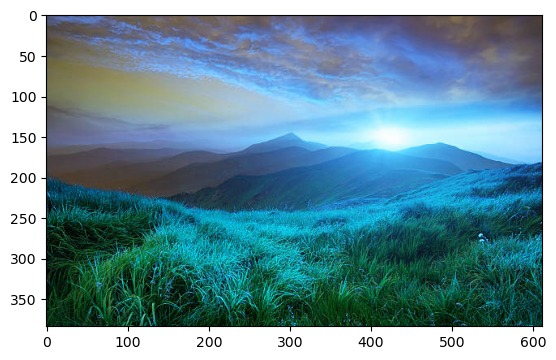

In [9]:
# Visualiza a imagem
plt.imshow(img1)

As imagens são carregadas no formato BGR pelo cv2, por conta de uma decisão histórica. Contudo, as maiores das imagens hoje em dia são no formato RGB e por isso a acima acima está mais azulada.

In [10]:
# Função customizada
# *args recebe qualquer n de argumentos
def visualiza_imagem(*args, figsize = 8, to_rgb = True, title = None, fontsize = 10):
    
    # Ajusta o tamanho da imagem
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    
    # Lista com todas as imagens passadas como argumento
    images = args[0] if type(args[0]) is list else list(args)
    
    # Converteremos as imagens para RGB
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    
    # Cada imagem deverá ter um título
    if title is not None:
        assert len(title) == len(images), "Forneça um título para a imagem."
    
    # Tamanho da figurea
    plt.figure(figsize = figsize)
    
    # Cria os subplots para imprimir as imagens
    for i in range(1, len(images) + 1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i - 1], fontsize = fontsize)
        plt.imshow(images[i - 1])
        plt.axis('off')

A função acima converte os canais de cores em RGB para visualizar a imagem, conforme imagem abaixo. 

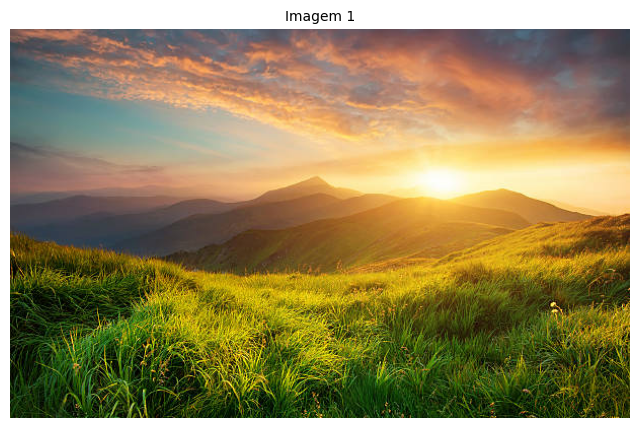

In [11]:
# Carregando e visualizando uma imagem
img1 = cv2.imread('imagens/img1.jpg')
visualiza_imagem(img1, title = ['Imagem 1'])

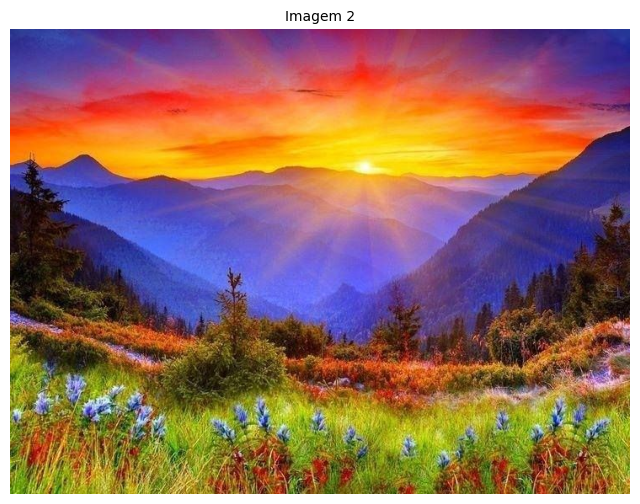

In [12]:
# Carregando e visualizando uma imagem
img2 = cv2.imread('imagens/img2.jpg')
visualiza_imagem(img2, title = ['Imagem 2'])

### 1.3 Visualizando e Customizando os Canais de Cores

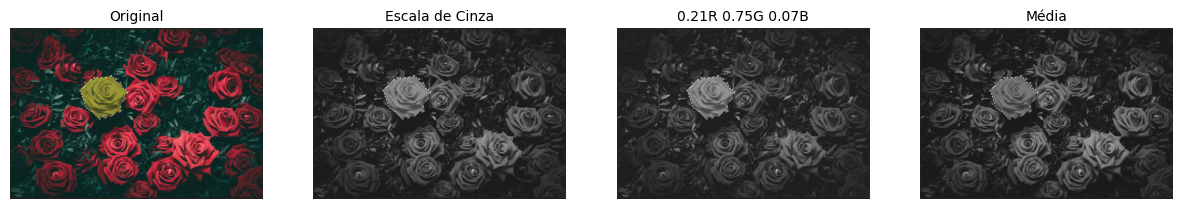

In [13]:
# Carregando uma imagem de formas diferentes

# Imagem original
img3_A = cv2.imread('imagens/img3.png')

# Imagem com escala de cinza
img3_B = cv2.imread('imagens/img3.png', cv2.IMREAD_GRAYSCALE)

# Matriz de pixels e divisão dos canais de cores
img_temp = cv2.imread('imagens/img3.png').astype('float32')
b, g, r = cv2.split(img_temp)

# Modificando o percentual de cada cor da imagem
img3_C = (0.21*r + 0.72*g + 0.07*b).astype('uint8')

# Equalizando os pixels pela média
img3_D = ((r + g + b) / 3.0).astype('uint8')

# Visualizando as imagens
visualiza_imagem(img3_A, img3_B, img3_C, img3_D, title = ['Original',
                                                          'Escala de Cinza',
                                                          '0.21R 0.75G 0.07B',
                                                          'Média'], figsize = 15) 

As imagens muitas vezes precisam ser colocadas em uma escala de cinza para facilitar o processamento do modelo de IA. Outro ponto é que precisamos customizar as imagens porque alguns detalhes ficam mais visíveis quando alteramos um pouco os canais de cores. 

In [14]:
# Carregando a imagem e visualizando os canais de cores

# Imagem original
img4 = cv2.imread('imagens/img4.jpg')

# Split dos canais de cores
# A saída do cv2 é BGR também! Atenção neste ponto!
b, g, r = cv2.split(img4)

print(f'Dimensões da Imagem: {img4.shape}')

# Dimensões de um dos canais de cores
print(f'Dimensões de b: {b.shape}')

# Dimensões de um dos canais de cores
print(f'Dimensões de g: {g.shape}')

# Dimensões de um dos canais de cores
print(f'Dimensões de r: {r.shape}')

Dimensões da Imagem: (365, 640, 3)
Dimensões de b: (365, 640)
Dimensões de g: (365, 640)
Dimensões de r: (365, 640)


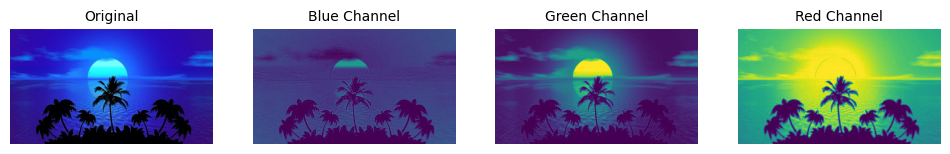

In [15]:
# Visualiza a imagem com o padrão BGR
visualiza_imagem(img4, b, g, r, 
                 to_rgb = False, 
                 title = ['Original', 'Blue Channel', 'Green Channel', 'Red Channel'], figsize = 12)

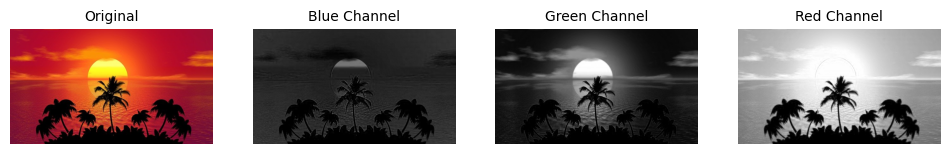

In [16]:
# Visualiza a imagem com o padrão RGB
visualiza_imagem(img4, b, g, r, 
                 to_rgb = True, 
                 title = ['Original', 'Blue Channel', 'Green Channel', 'Red Channel'], figsize = 12)

Quanto mais claro, mais um determinado canal contribui para a cor da imagem final. Por exemplo, o canal vermelho é mais claro porque a imagem original tem um tom maior de vermelho.